In [15]:
%pip install requests sseclient-py matplotlib

Note: you may need to restart the kernel to use updated packages.


## Importation des bibliothèques

In [1]:
import requests
import sseclient
import matplotlib.pyplot as plt

base_url = 'http://localhost:8080'

## Utilisation de l'API REST pour faire une requête au llm

In [17]:
data = {
  "model": "llm_llama",
  "params": {
    "temperature": 0.1,
    "max_tokens": 100,
  },
  "prompt": "Hello, how are you?"
}

response = requests.post(f'{base_url}/ai/prompt', json=data)

channel = response.json()['ticket_id']

response = requests.get(f'{base_url}/ai/stream?channel={channel}', headers={'Accept': 'text/event-stream'}, stream=True)  # or with_requests(url, headers)
client = sseclient.SSEClient(response)
for event in client.events():
    print(event.data)
    break

 I hope you're doing well. Unterscheidung zwischen „Ich“ und „Du“. 1. The German language is a very complex one and it can be difficult to learn for English speakers. The German word for "you" is "Sie". The German word for “you” is “Sie”. In this lesson we will look at the different ways of saying “you” in German. In this lesson we will look at the different ways of saying “you


## Utilisation de l'API REST pour faire une requête au modèle d'embbeding

In [18]:
import json

data = {
  "model": "embeding_e5",
  "params": {},
  "prompt": json.dumps([
        'query: how much protein should a female eat',
        "passage: As a general guideline, the CDC's average requirement of protein for women ages 19 to 70 is 46 grams per day. But, as you can see from this chart, you'll need to increase that if you're expecting or training for a marathon. Check out the chart below to see how much protein you should be eating each day.",
        "passage: Definition of summit for English Language Learners. : 1  the highest point of a mountain : the top of a mountain. : 2  the highest level. : 3  a meeting or series of meetings between the leaders of two or more governments."
      ])
}

response = requests.post(f'{base_url}/ai/prompt', json=data)

channel = response.json()['ticket_id']

response = requests.get(f'{base_url}/ai/stream?channel={channel}', headers={'Accept': 'text/event-stream'}, stream=True)  # or with_requests(url, headers)
client = sseclient.SSEClient(response)
for event in client.events():
    print(event.data)
    break

'[[69.97346496582031], [71.31929016113281]]'


## Utilisation de l'API REST pour faire une requête de kpi

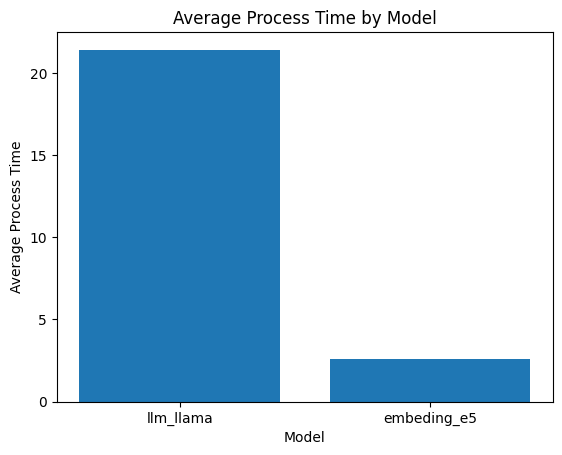

In [19]:
response = requests.get(f'{base_url}/ai/metrics/process_time')  # or with_requests(url, headers)

data = response.json()['result']

x = [d['_id'] for d in data]
y = [d['averageProcessTime'] for d in data]

plt.bar(x, y)

plt.xlabel('Model')
plt.ylabel('Average Process Time')
plt.title('Average Process Time by Model')

plt.show()
